$Info$\
Dataset: 
1. The dataset contains approximately 10 years of daily weather observations from multiple locations across Australia. 
2. The target variable to predict is "RainTomorrow," which indicates whether it rained the following day (Yes or No). 
3. In this dataset, the "RainTomorrow" column is labeled as "Yes" if the rainfall for that day measured 1mm or more.


$Task$
1. Import Libraries: Begin by importing the necessary libraries for data analysis and modeling.
2. Import Dataset: Load the dataset into your Python environment.
3. Exploratory Data Analysis (EDA): Conduct exploratory data analysis to gain insights into the dataset, understand its structure, and identify any initial patterns or trends.
3. Handling Missing Values: Identify missing values in the dataset and apply appropriate techniques to handle them, such as imputation or removal.
3. Handling Outliers: Identify any outliers in the data and decide on an approach to handle them, such as filtering or transforming the data.
3. Identifying Correlations: Analyze the relationships between variables and identify any correlations that may exist.
3. Handling Non-Numeric Categorical Values: If the dataset contains non-numeric categorical values, apply suitable techniques to handle them, such as one-hot encoding or label encoding.
4. Separating Feature Set and Target Variable: Split the dataset into the feature set (input variables) and the target variable (RainTomorrow)
5. Splitting Data: Divide the dataset into separate training and test sets to evaluate the performance of the model.
6. Identifying and Selecting Best Features: Employ feature selection techniques
7. Identify the most relevant features for the logistic regression model.
8. Feature Scaling: Perform feature scaling if necessary to ensure that all features are on a similar scale.
9. Model Training: Train a logistic regression model on the training dataset.
10. Prediction: Use the trained model to make predictions on the test dataset.
11. Accuracy Score: Calculate the accuracy score to evaluate the performance of the logistic regression model.
12. Generate Confusion Matrix, Classification Report, and ROC-AUC: Analyze the model's performance further by generating a confusion matrix, classification report, and ROC-AUC curve.
13. Hyperparameter Optimization: Fine-tune the hyperparameters of the logistic regression model to achieve better performance if necessary.


Import Libraries

In [1]:
import pandas as pd
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler

Import Dataset

In [2]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\Dataset\imarticus\basant ml\weatherAUS.csv")

Handling Missing Values

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.shape

(145460, 23)

In [9]:
def fillnan(df, columns, groupby_column):
    for col in columns:
        df[col] = df.groupby(groupby_column)[col].transform(lambda x: x.fillna(x.mean()))
    return df

In [10]:
colm= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [11]:
df = fillnan(df,colm,df.Location)

In [12]:
df = df.dropna(subset=['RainTomorrow'], axis=0)

In [13]:
colm2=['Evaporation','Sunshine', 'WindGustSpeed','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']
df[colm2]=df[colm2].fillna(df[colm2].mean())

In [14]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [15]:
df['WindGustDir']=df.groupby('Location')['WindGustDir'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)
df = df.dropna(subset=['WindGustDir'], axis=0)

In [16]:
df['WindDir9am']=df.groupby('Location')['WindDir9am'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)
df = df.dropna(subset=['WindDir9am'], axis=0)

In [17]:
df['WindDir3pm']=df.groupby('Location')['WindDir3pm'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)
df = df.dropna(subset=['WindDir3pm'], axis=0)

In [18]:
df['RainToday']=df.groupby('Location')['RainToday'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)
df = df.dropna(subset=['RainToday'], axis=0)

In [19]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Exploratory Data Analysis (EDA)

<Axes: xlabel='RainTomorrow', ylabel='count'>

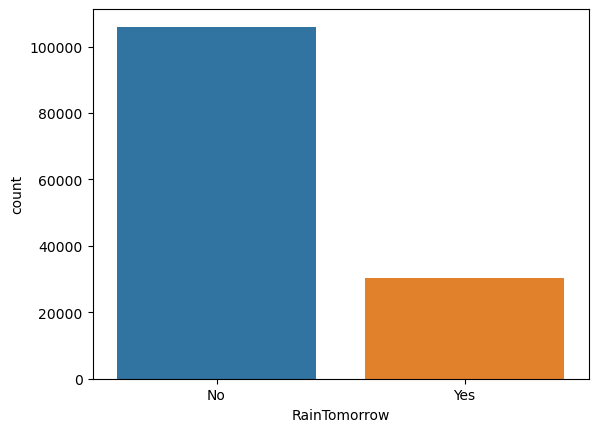

In [20]:
sns.countplot(x='RainTomorrow',data=df)

In [21]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.437167,7.648635,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.406447,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.437167,7.648635,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,6.391001,5.406447,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.437167,7.648635,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,6.391001,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.437167,7.648635,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,6.391001,5.406447,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.437167,7.648635,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.437167,7.648635,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,5.543103,4.834532,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.437167,7.648635,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.543103,4.834532,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.437167,7.648635,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.543103,4.834532,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.437167,7.648635,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.543103,4.834532,12.5,26.1,No,No


Identifying Correlations

In [22]:
df.corr()

C:\Users\aarza\AppData\Local\Temp\ipykernel_9528\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.740061,0.106720,0.364583,0.059779,0.174470,0.185237,0.179581,-0.242090,-0.005980,-0.429538,-0.440555,0.030811,-0.010124,0.901849,0.714494
MaxTemp,0.740061,1.000000,-0.072211,0.451736,0.342519,0.066034,0.018725,0.051664,-0.509250,-0.511416,-0.311611,-0.400249,-0.233812,-0.231336,0.888143,0.983313
Rainfall,0.106720,-0.072211,1.000000,-0.036639,-0.178819,0.129902,0.087164,0.061236,0.222965,0.254478,-0.162398,-0.123288,0.160726,0.138560,0.012284,-0.075368
Evaporation,0.364583,0.451736,-0.036639,1.000000,0.304755,0.145951,0.143505,0.088553,-0.391149,-0.303797,-0.211498,-0.233193,-0.166251,-0.164953,0.424503,0.439734
Sunshine,0.059779,0.342519,-0.178819,0.304755,1.000000,-0.025423,0.010788,0.031508,-0.371507,-0.468948,0.031984,-0.015077,-0.546285,-0.564736,0.217868,0.358110
WindGustSpeed,0.174470,0.066034,0.129902,0.145951,-0.025423,1.000000,0.599341,0.679184,-0.211289,-0.024399,-0.430574,-0.388289,0.041368,0.075627,0.144881,0.028302
WindSpeed9am,0.185237,0.018725,0.087164,0.143505,0.010788,0.599341,1.000000,0.515819,-0.267553,-0.022238,-0.219293,-0.169877,-0.014864,0.023070,0.134392,0.003113
WindSpeed3pm,0.179581,0.051664,0.061236,0.088553,0.031508,0.679184,0.515819,1.000000,-0.140559,0.023771,-0.285325,-0.247342,0.027436,0.018176,0.166104,0.025918
Humidity9am,-0.242090,-0.509250,0.222965,-0.391149,-0.371507,-0.211289,-0.267553,-0.140559,1.000000,0.667412,0.134431,0.179546,0.363683,0.292271,-0.478275,-0.500512
Humidity3pm,-0.005980,-0.511416,0.254478,-0.303797,-0.468948,-0.024399,-0.022238,0.023771,0.667412,1.000000,-0.023207,0.052196,0.400127,0.411231,-0.232384,-0.559576


C:\Users\aarza\AppData\Local\Temp\ipykernel_9528\1006740634.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

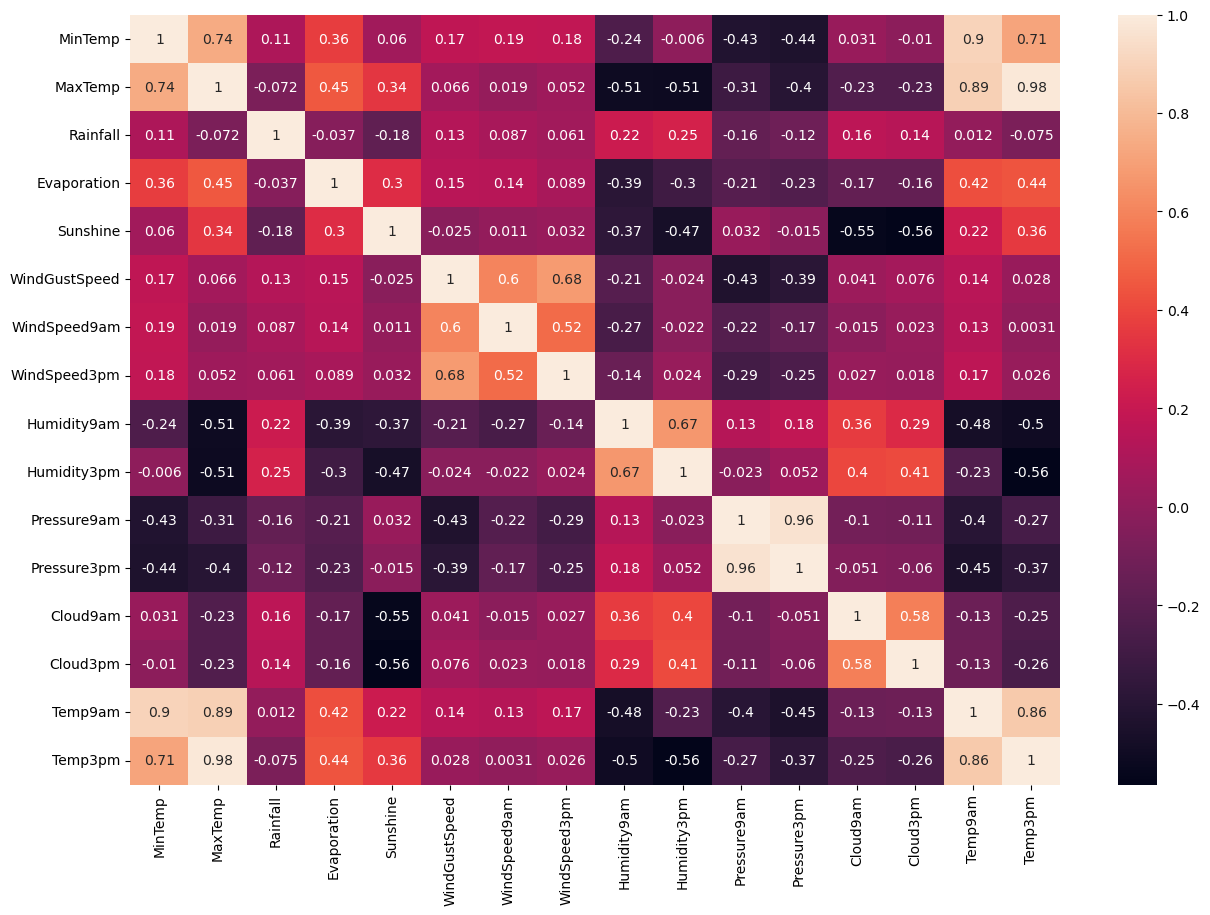

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

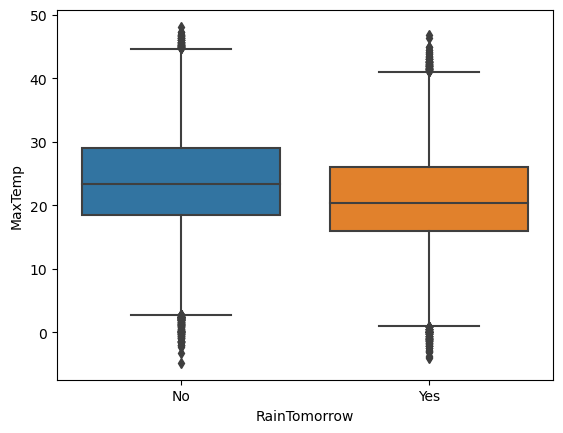

In [24]:
sns.boxplot(x='RainTomorrow',y='MaxTemp',data=df)

<Axes: xlabel='RainTomorrow', ylabel='MinTemp'>

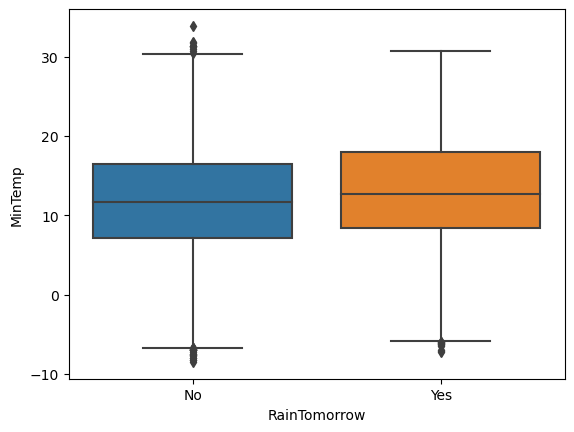

In [25]:
sns.boxplot(x='RainTomorrow',y='MinTemp',data=df)

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

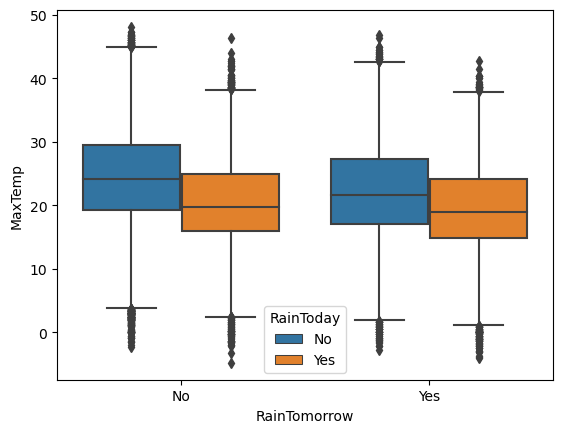

In [26]:
sns.boxplot(x='RainTomorrow',y='MaxTemp',hue='RainToday',data=df)

In [27]:
df['RainToday'].value_counts()

No     106381
Yes     29841
Name: RainToday, dtype: int64

Handling Outliers

In [28]:
df['zscore']=(df.MaxTemp-df.MaxTemp.mean())/df.MaxTemp.std()
df1=df[(df.zscore<-3) | (df.zscore>3)]
df2=df[(df.zscore>-3) | (df.zscore<3)]

In [29]:
len(df1)

292

In [30]:
len(df2)

136222

In [31]:
q1=df.MaxTemp.quantile(0.25)
q3=df.MaxTemp.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [32]:
print('q1',q1)
print('q3',q3)
print('iqr',iqr)
print('lower',lower)
print('upper',upper)

q1 17.9
q3 28.4
iqr 10.5
lower 2.1499999999999986
upper 44.15


In [33]:
df3=df[(df['MaxTemp']<=upper) & (df['MaxTemp']>=lower)]
df4=df[(df['MaxTemp']>=upper) | (df['MaxTemp']<=lower)]

In [34]:
len(df3)

135852

In [35]:
len(df4)

370

Handling Non-Numeric Categorical Values

In [36]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'zscore'],
      dtype='object')

In [37]:
cat_cols=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
colm3= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [38]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [39]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,5.437167,7.648635,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,5.437167,7.648635,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,5.437167,7.648635,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,5.437167,7.648635,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,5.437167,7.648635,41.0,7.0,20.0,82.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,0.0,5.437167,7.648635,31.0,15.0,13.0,59.0,...,0,0,0,0,0,0,0,0,0,0
145455,2017-06-21,2.8,23.4,0.0,5.437167,7.648635,31.0,13.0,11.0,51.0,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,3.6,25.3,0.0,5.437167,7.648635,22.0,13.0,9.0,56.0,...,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,5.4,26.9,0.0,5.437167,7.648635,37.0,9.0,9.0,53.0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
#Encoding for target variable
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [41]:
df['RainTomorrow'].value_counts()

0    105978
1     30244
Name: RainTomorrow, dtype: int64

Separating Feature Set and Target Variable

In [42]:
x=df.drop(['RainTomorrow','Date'],axis=1)
x1=x.columns

In [43]:

scaler=RobustScaler()
scaler.fit(x)
x=pd.DataFrame(scaler.fit_transform(x),columns=x1)


In [44]:
y=df['RainTomorrow']

Splitting Data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Split the data 

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [47]:
log.fit(x_train,y_train)

C:\Users\aarza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred=log.predict(x_test)

In [49]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
cm

array([[20029,  1095],
       [ 3014,  3107]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.8491833363919985

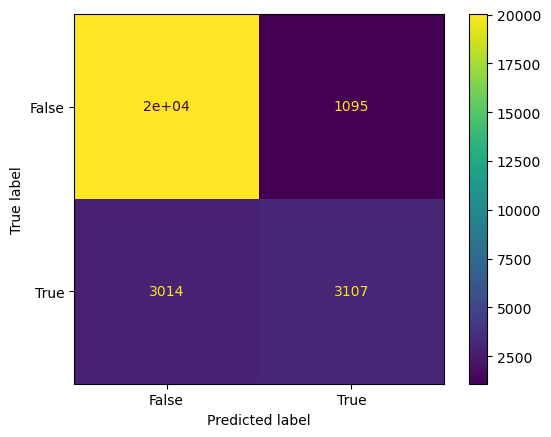

In [51]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()

In [52]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21124
           1       0.74      0.51      0.60      6121

    accuracy                           0.85     27245
   macro avg       0.80      0.73      0.75     27245
weighted avg       0.84      0.85      0.84     27245



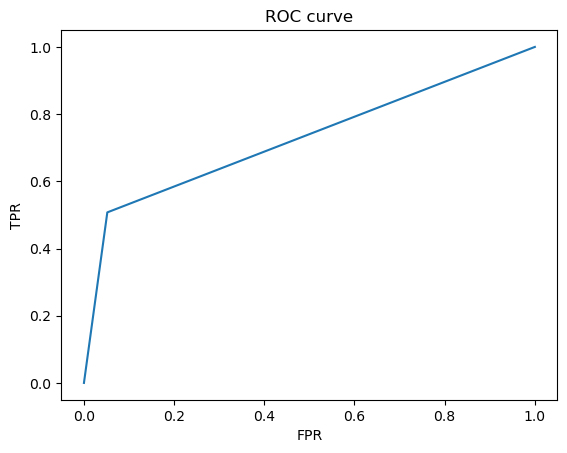

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Compute the false positive rate (FPR) and true positive rate (TPR) using the predicted values (y_pred) and true values (y_test)

plt.clf()  # Clear the current figure

plt.plot(fpr, tpr)  # Plot the ROC curve using the FPR and TPR values

plt.xlabel('FPR')  # Set the label for the x-axis as "FPR" (False Positive Rate)
plt.ylabel('TPR')  # Set the label for the y-axis as "TPR" (True Positive Rate)
plt.title('ROC curve')  # Set the title of the plot as "ROC curve"

plt.show()

Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [55]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)
y_pred_gini1=clf_gini.predict(x_test)
print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini1)))

Model accuracy: 0.8295


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_space={'criterion':['gini','entropy'],
           'max_depth':[1,2,3],
          }

In [58]:
dt = DecisionTreeClassifier()
model = GridSearchCV(dt,grid_space,cv=3,scoring='accuracy')
model.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3]},
             scoring='accuracy')

In [59]:
model.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [60]:
model.best_score_

0.8272378489295152

In [61]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy: 0.8295


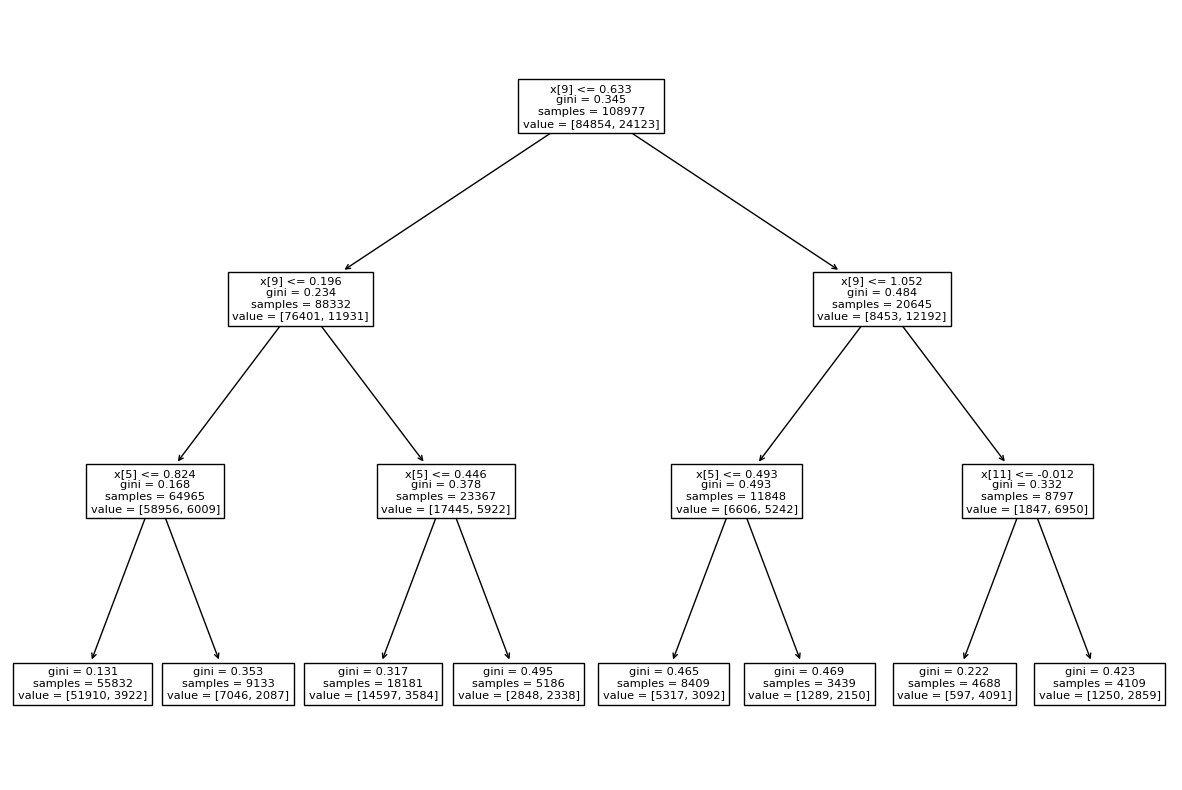

In [62]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.fit(x_train,y_train))
plt.show()

In [63]:
y_train.value_counts()

0    84854
1    24123
Name: RainTomorrow, dtype: int64

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb=GradientBoostingClassifier()

In [66]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [67]:
y_pred=gb.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred)

0.8514956872820701

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm=SMOTE()

In [71]:
columns=x_train.columns
sm_x,sm_y=sm.fit_resample(x_train,y_train)
sm_x=pd.DataFrame(sm_x,columns=columns)
sm_y=pd.DataFrame(sm_y,columns=['RainTomorrow'])

In [72]:
sm_y.value_counts()

RainTomorrow
0               84854
1               84854
dtype: int64

In [73]:
gb=GradientBoostingClassifier()

In [74]:
gb.fit(sm_x,sm_y)

C:\Users\aarza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [75]:
y_pred=gb.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred)

0.8266837951917783

In [77]:
from imblearn.combine import SMOTETomek

In [78]:
smt=SMOTETomek()

In [79]:
columns=x_train.columns
smt_x,smt_y=smt.fit_resample(x_train,y_train)
smt_x=pd.DataFrame(smt_x,columns=columns)
smt_y=pd.DataFrame(smt_y,columns=['RainTomorrow'])

In [80]:
smt_y.value_counts()

RainTomorrow
0               84668
1               84668
dtype: int64

In [81]:
gb.fit(smt_x,smt_y)

C:\Users\aarza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [82]:
y_pred=gb.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred)

0.825729491649844

In [84]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid_space={'loss':['log_loss','deviance', 'exponential'],
            'n_estimators':[100,300,500],
            'min_samples_split':[2,3],
            'min_samples_leaf':[1,2],
            'max_depth':[2,3]}

In [ ]:
model = GridSearchCV(gb,grid_space,cv=3,scoring='accuracy')
model.fit(sm_x,sm_y)

C:\Users\aarza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aarza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aarza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aarza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin